## All the import statements for this ipynb file

In [1]:
from cl_DataCleaning import DataCleaning
from cl_Plotter import Plotter
import missingno as msno
import pandas as pd

***Task-1 : created ipynb file and don't seem to have anything to convert ***
***Task-2 : checked data types and statistical values in DataCleaning.load_data and NULL percentage in the DataFrame.***
***Task-3a : Removing columns with large missing values***
1. analyse_missing_values method gives information about the percentage of missing values in all columns
2. drop_col_with_nulls method first gets the percentage of missing data in whole dataframe then sets a threshold. This missing data variable along with the threshold is used in dataframe.drop method to drop columns where threshold is greated than 80%. This is done so that missing data columns don't help in drawing insights and can become hindrance for analysis.

In [ ]:
## Task-2 Data analysis and tranformation
# data_tf = DataTransform()
df = pd.read_csv("loan_payments.csv",index_col=0)
o_DataCleaning = DataCleaning(df)

o_DataCleaning.analyse_missing_values()

o_DataCleaning.drop_col_with_nulls()

o_DataCleaning.analyse_missing_values()


# Task 3b - Imputing of data
In this task missing values for specific column is dealt with by imputing them with the median values. Data imputation is the process of replacing missing or unavailable entries in a dataset with substituted values. This process is crucial for maintaining the integrity of data analysis, as incomplete data can lead to biased results and diminish the quality of the dataset. 
In the below code the column mths_since_last_delinq has 57% of missing values but now has been imputed with the median values. The result is reflected in both graph and the stats(before & after) of column values.

In [ ]:
## Task-3b Remove impute/missing values 
df = pd.read_csv("loan_payments.csv",index_col=0)
o_DataCleaning = DataCleaning(df)
o_DataCleaning.analyse_missing_values()
o_DataCleaning.impute_col()
o_DataCleaning.analyse_missing_values()
# o_DataCleaning.remove_outliers_zscore() # not working, code needs to be debugged

# Task 4 - Tranformations on skewed columns
Skewness of column can be caused by either incorrectly copying the data, sorted and partially copying the data, generally incomplete data etc. E.g. if salary range is from £500.00 to £1500.00 but the data somehow falls  only between 1000 and 1500. This can produce incorrect data insights.
Skewness can be fixed using functions called log-tranform.
As per below initial skewness was 0.81 which after log tranform became -0.68 which is NOT great.
So, tried using Box-cox Transformation which gave reduced the skewness of -0.04.
Tried Yeo-Johnson as well which also gave reduced the skewness of -0.04.
So, conclusion is we need to be open to try above different functions if one doesn't fix the skewness as we want.


['term', 'grade', 'sub_grade', 'employment_length', 'home_ownership', 'verification_status', 'issue_date', 'loan_status', 'payment_plan', 'purpose', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date', 'application_type']
Before log transform


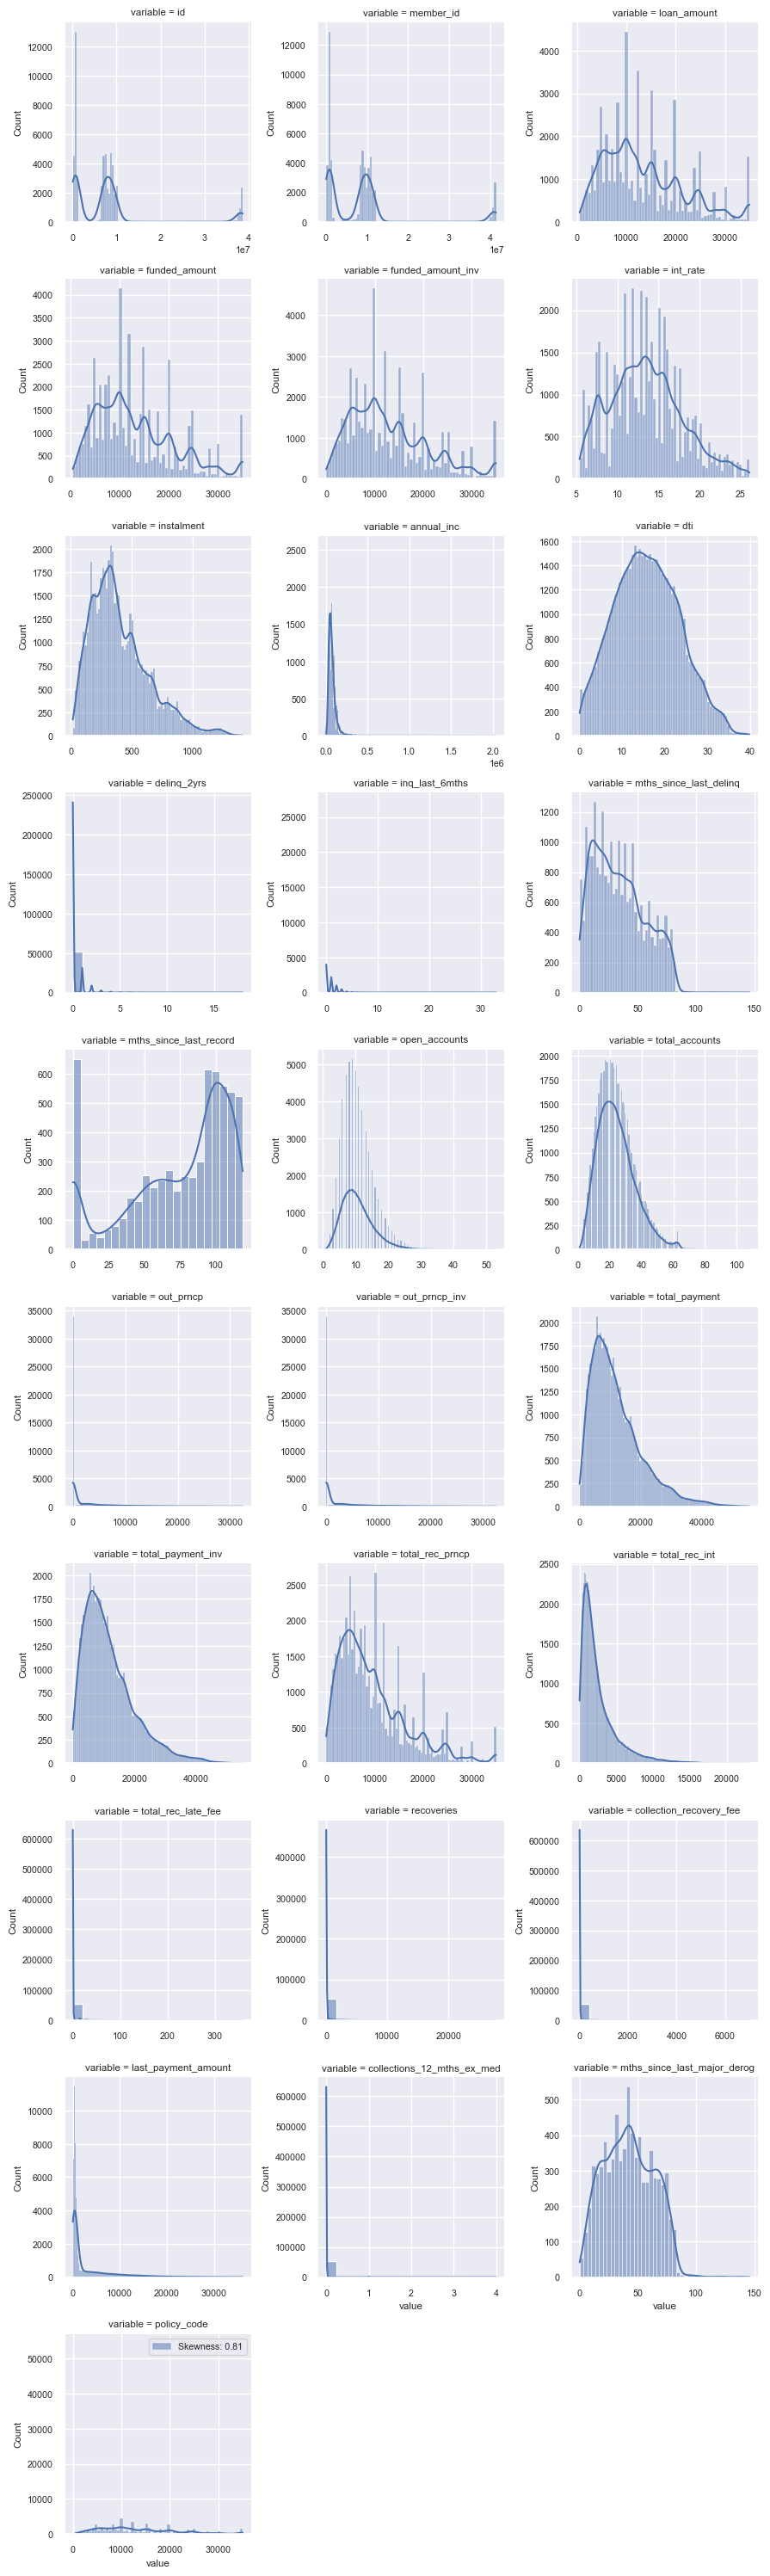

loan_amount - After Log Transform


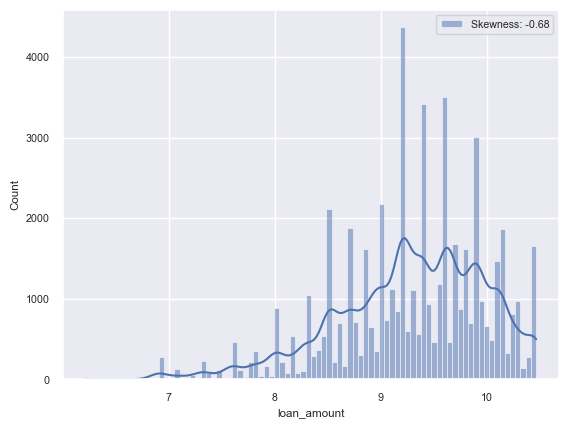

loan_amount - After Box-cox Transformation


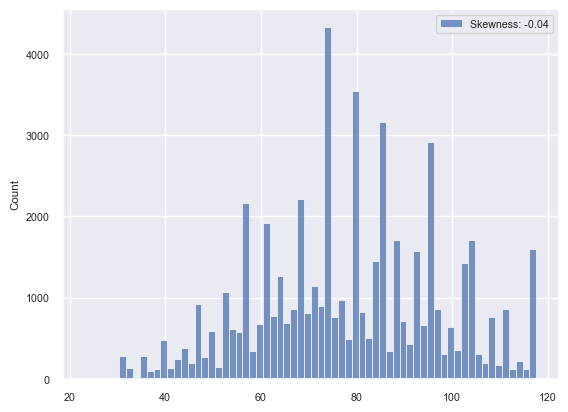

loan_amount - After Yeo-Johnson Transformation


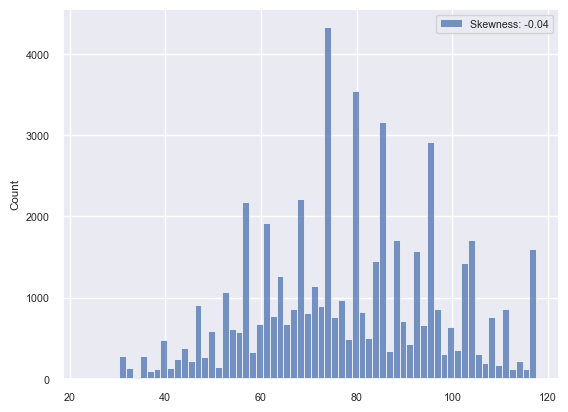

total_payment - Log Transform


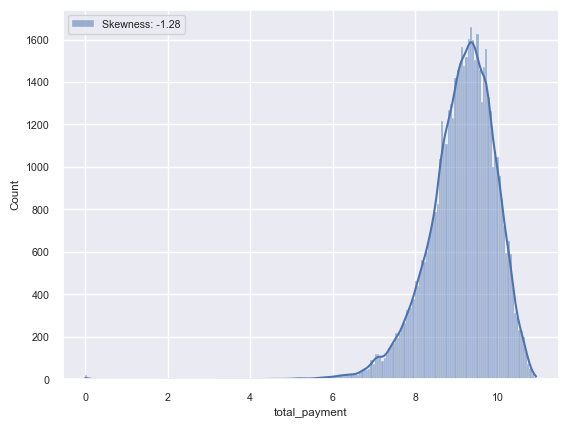

total_payment - Box-cox Transformation


ValueError: Data must be positive.

In [2]:
## Task 4 - Tranformations on skewed columns
df = pd.read_csv("loan_payments.csv",index_col=0)
o_DataCleaning = DataCleaning(df)
## Finding skewed data
o_DataCleaning.find_skewed_columns()

o_DataCleaning.fix_skew_log_transform()

# Task 5 - Outliers
In the below exercise Outliers are identified e.g. in all the grades there is a int-rate value of 6 which is very out of range from all others, therefore an outlier. But, looking at the data for these outliers, they look completely normal just like rest of the data. As these are sitting separately, I don't think they will infuence any insights drawn from overall data.

Still, the above outliers are removed just as a technical task and is plotted again as clean data.

percentage of missing values in each column:
id                              0.000000
member_id                       0.000000
loan_amount                     0.000000
funded_amount                   5.544799
funded_amount_inv               0.000000
term                            8.799395
int_rate                        9.531449
instalment                      0.000000
grade                           0.000000
sub_grade                       0.000000
employment_length               3.905515
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_date                      0.000000
loan_status                     0.000000
payment_plan                    0.000000
purpose                         0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_credit_line            0.000000
inq_last_6mths                  0.000000
mths_since_last_delinq         57.166565
mths_since_l

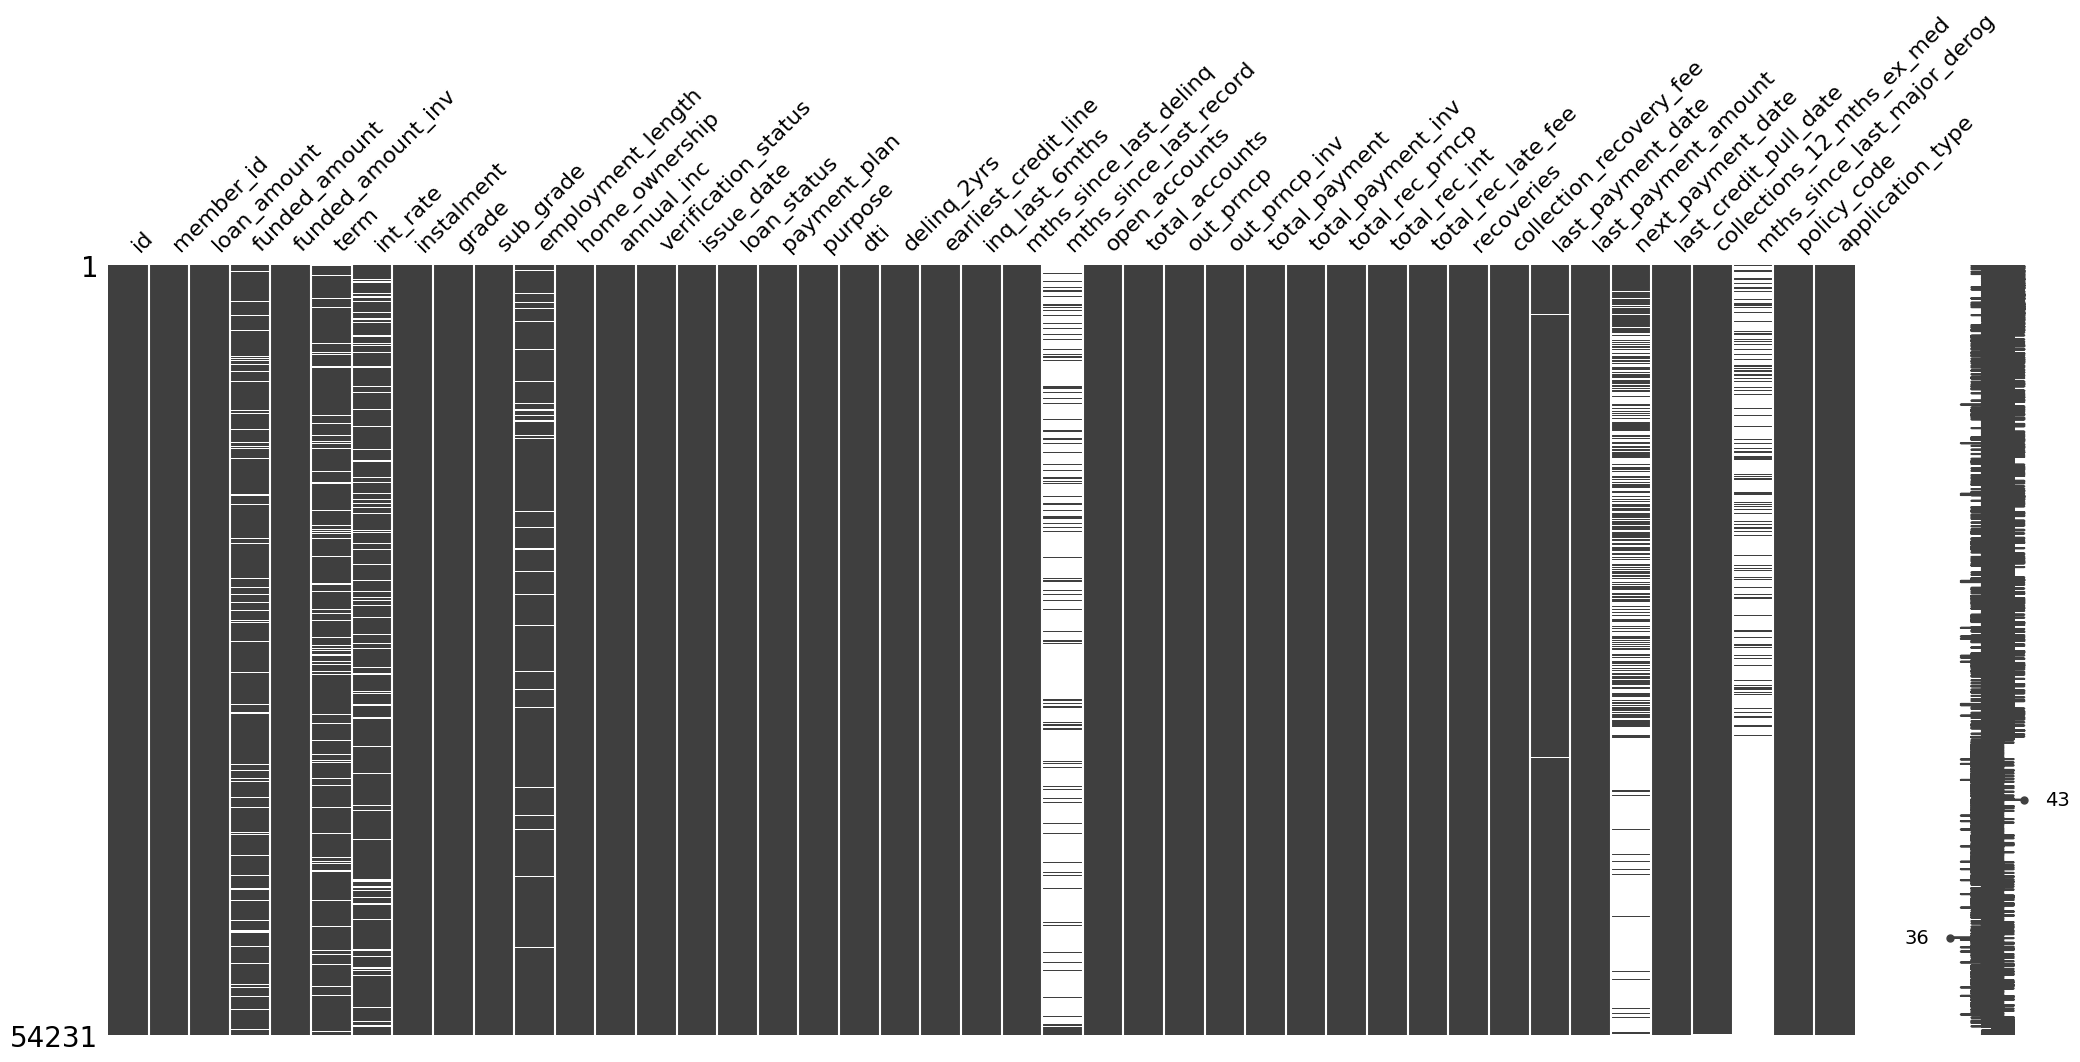

Using BoxPlot to identify outliers


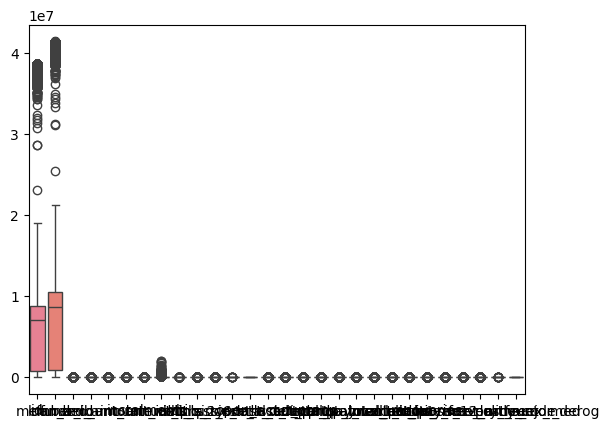

Using Scatter plot to identify outliers


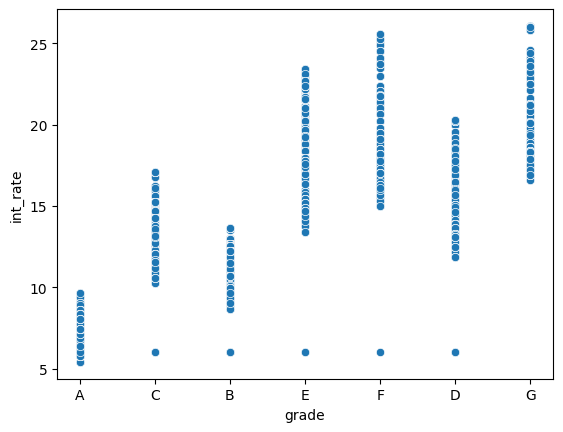

Removing outliers found using Scatter plot


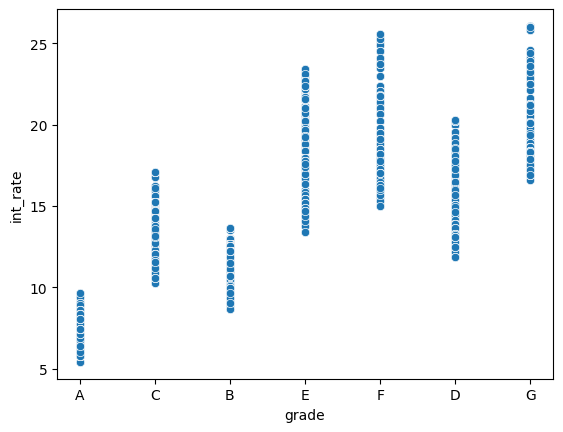

In [ ]:
# Task 5 Outliers
df = pd.read_csv("loan_payments.csv",index_col=0)
o_DataCleaning = DataCleaning(df)
o_DataCleaning.analyse_missing_values()
o_DataCleaning.impute_col()
# o_DataCleaning.remove_outliers_zscore() ## this code needs to be looked at as it is giving error

plot = Plotter()
plot.load_data()
plot.identify_outliers()

# Removing above outliers and ploting data again
o_DataCleaning.remove_outliers_using_df_col_criteria()


Task 6 Corelated columns

In [2]:
## Corelated columns
plot = Plotter()
plot.load_data()
plot.identify_Collinearity()